In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.listdir(".")

['stream_plots',
 'bindMountResults.csv',
 'localResults.csv',
 'stream',
 'volumeResults.csv',
 '.git',
 'STREAM_Plots.ipynb',
 '.ipynb_checkpoints',
 'processResults.py']

In [4]:
df_local = pd.read_csv("localResults.csv", index_col=0)
df_volume = pd.read_csv("volumeResults.csv", index_col=0)
df_bind = pd.read_csv("bindMountResults.csv", index_col=0)

In [5]:
df_local.head()

,Bandwidth,AvgTime,Type,NumElements,Processes
0,17880.78,0.089848,Copy,100000000,1
1,17708.08,0.090590,Scale,100000000,1
2,20092.04,0.119661,Add,100000000,1
3,19902.12,0.120858,Triad,100000000,1
4,18659.02,0.085910,Copy,100000000,2


In [6]:
set(list(df_local["NumElements"]))

{1000000,
 2000000,
 5000000,
 10000000,
 25000000,
 50000000,
 100000000,
 250000000,
 500000000}

In [25]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom', rotation=45)

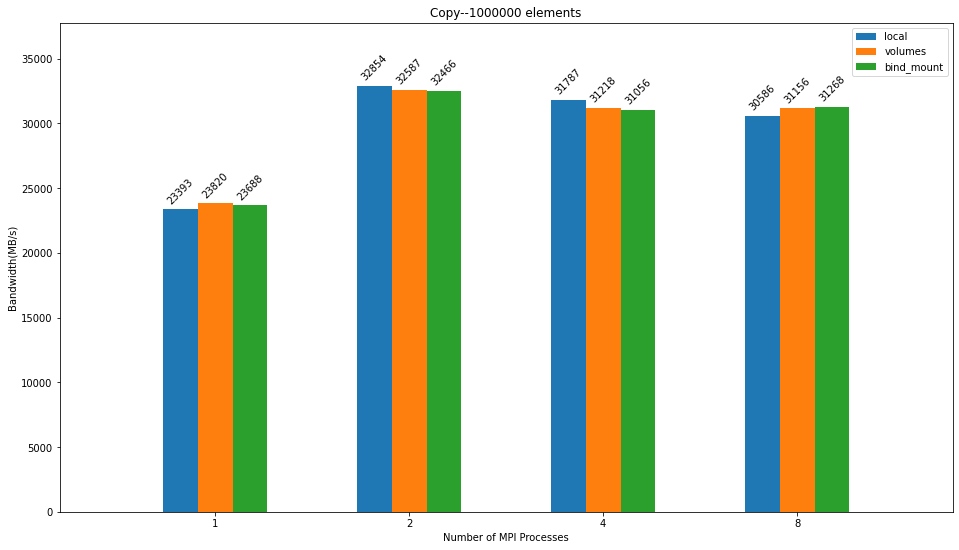

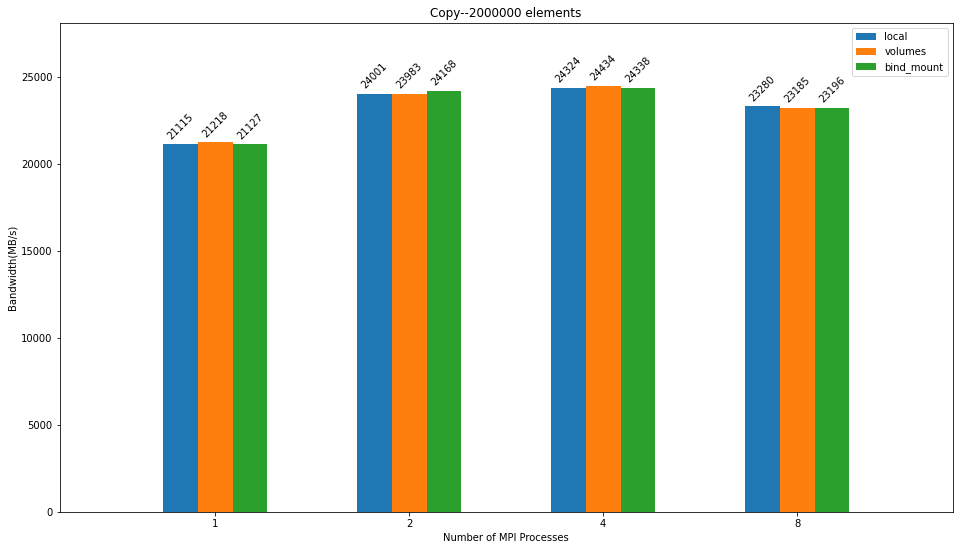

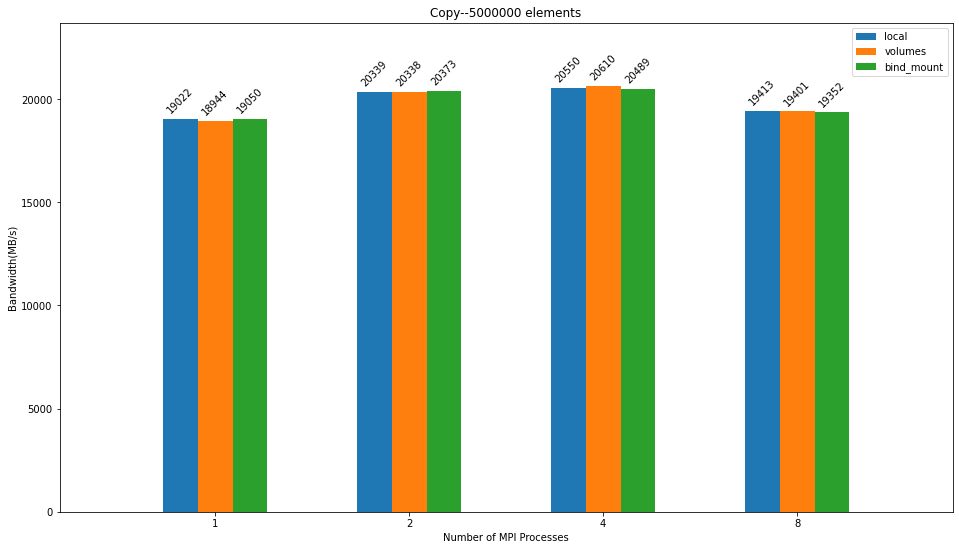

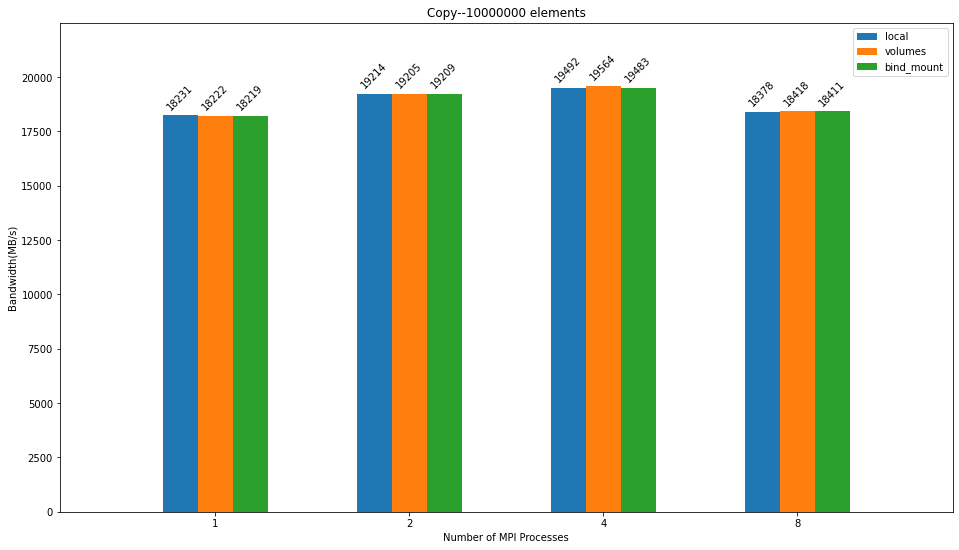

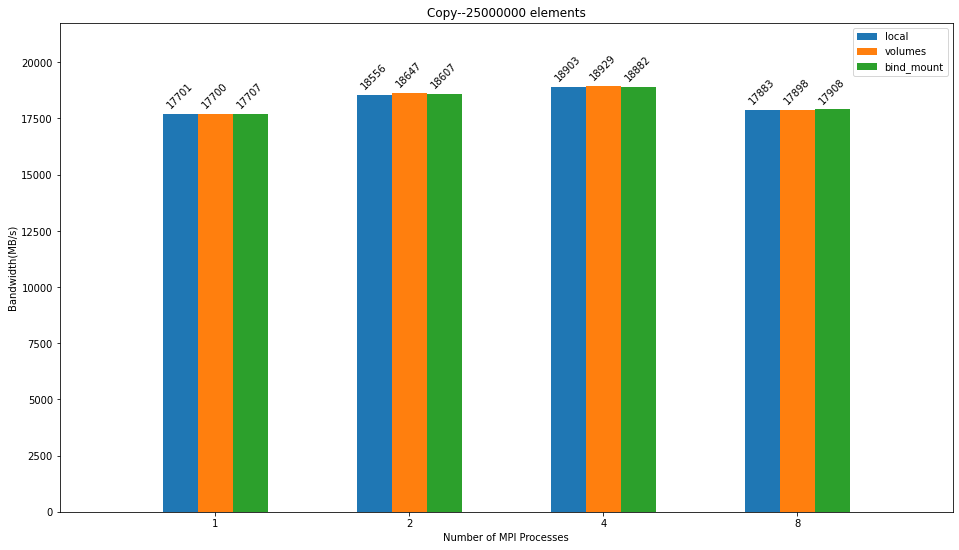

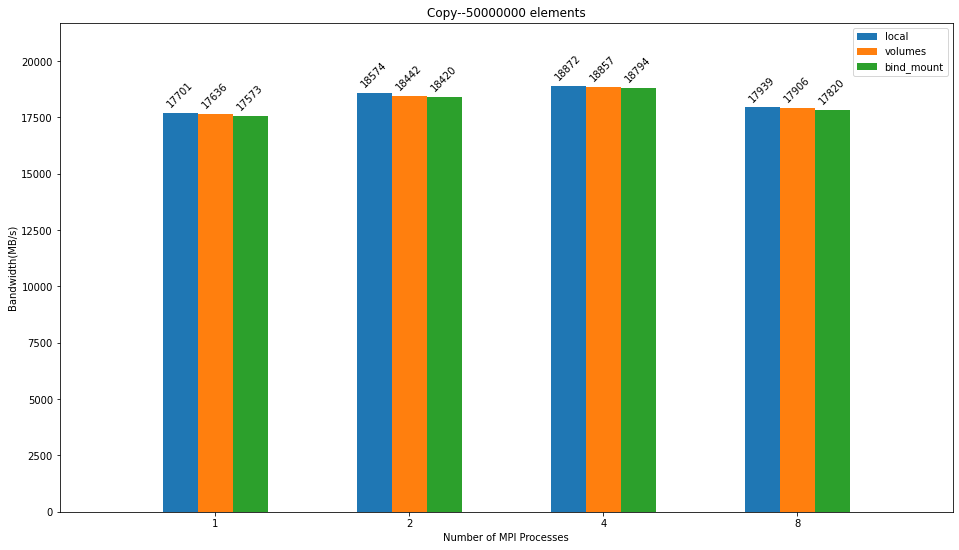

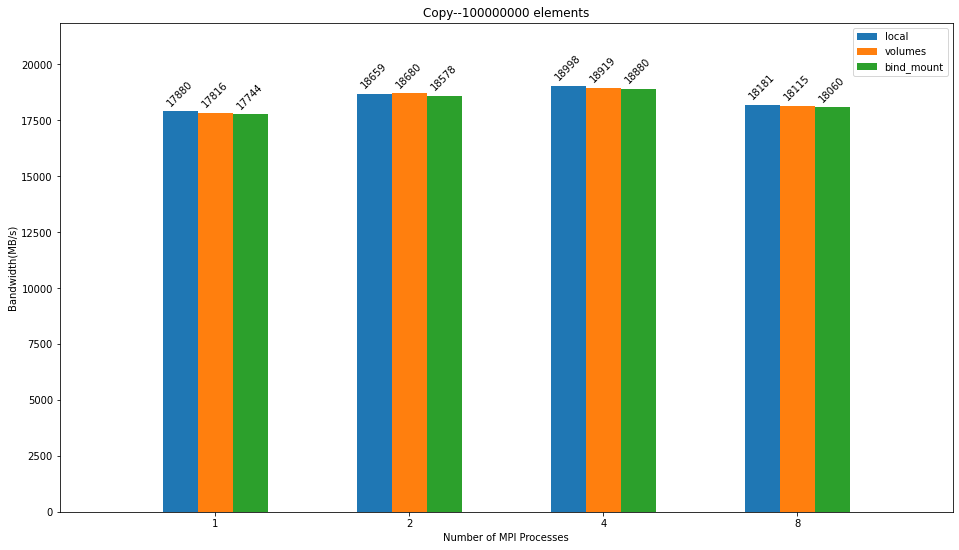

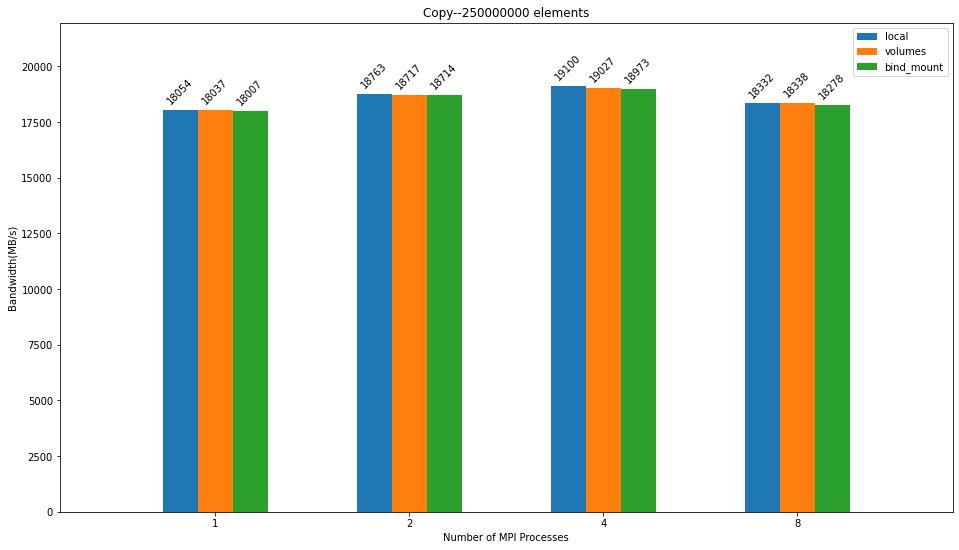

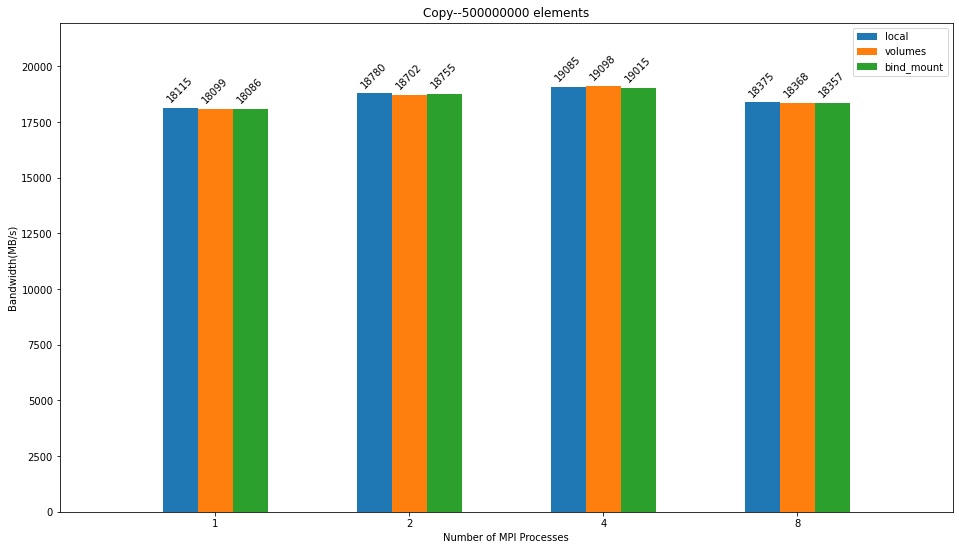

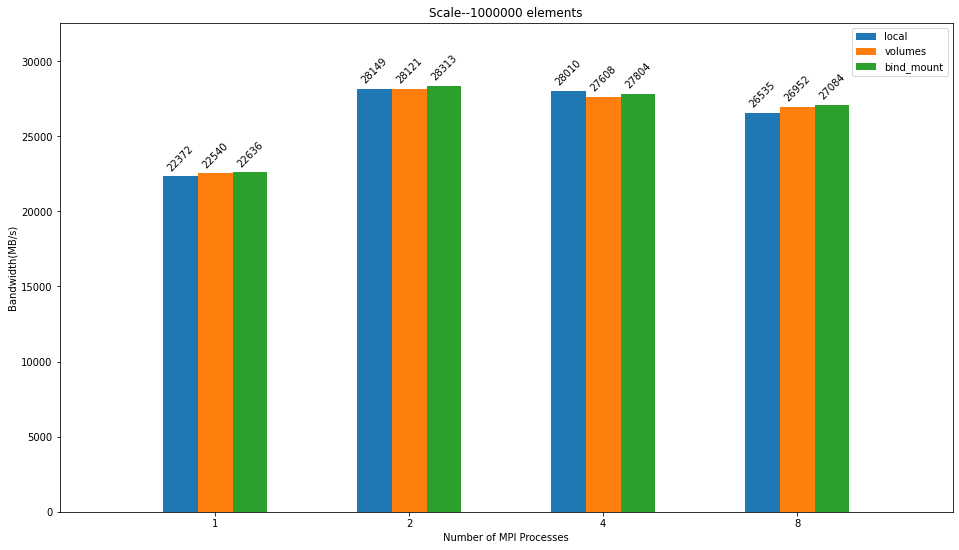

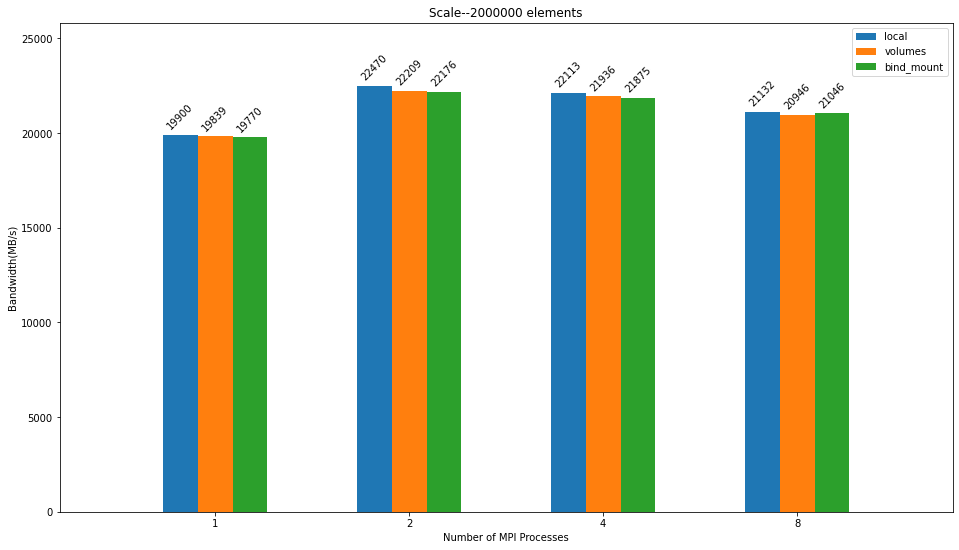

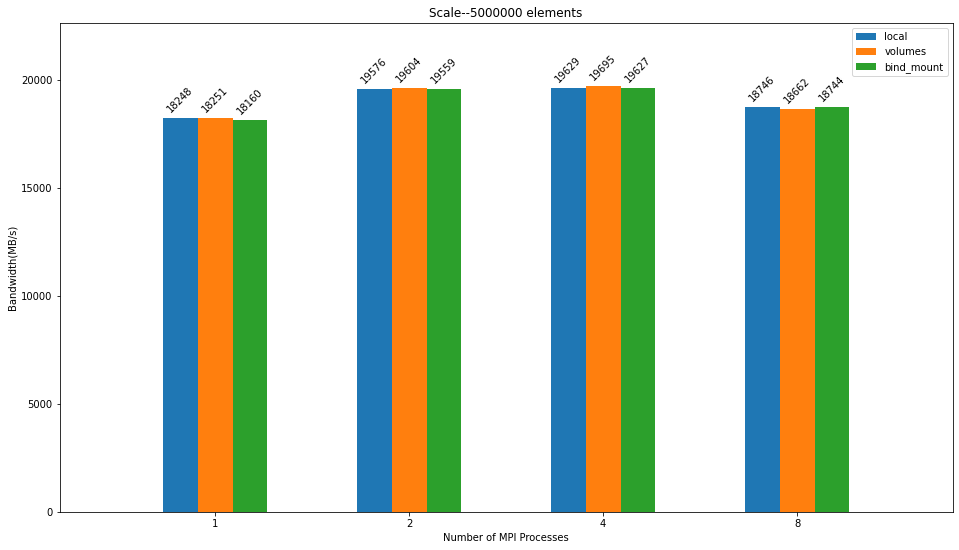

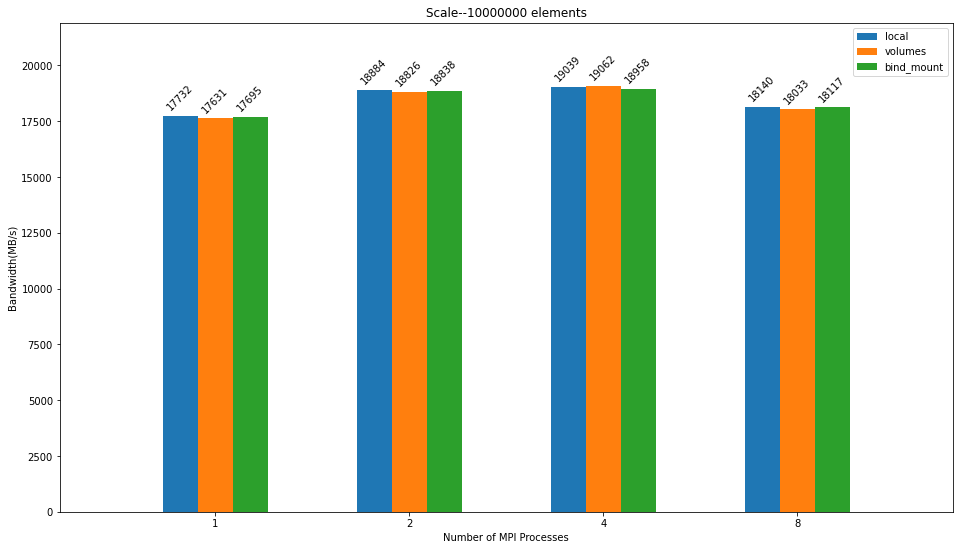

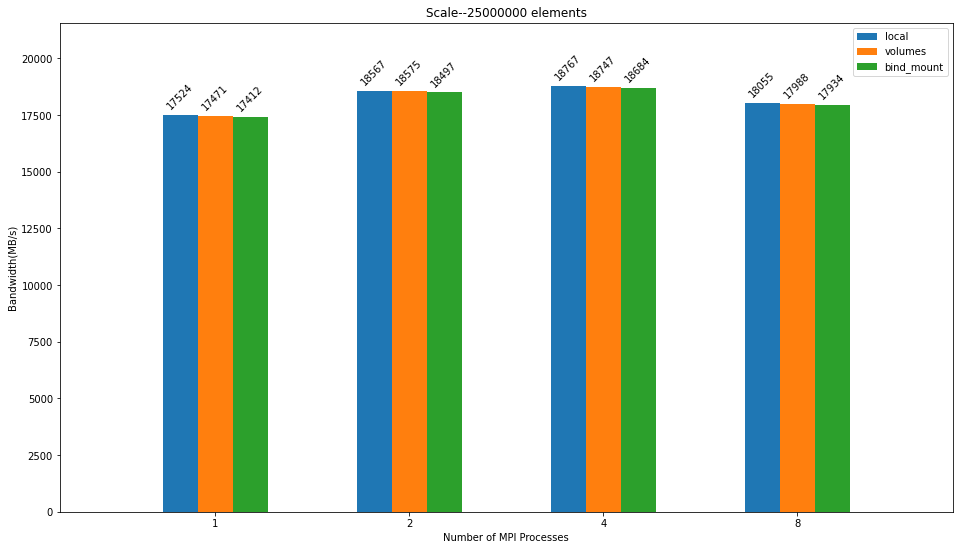

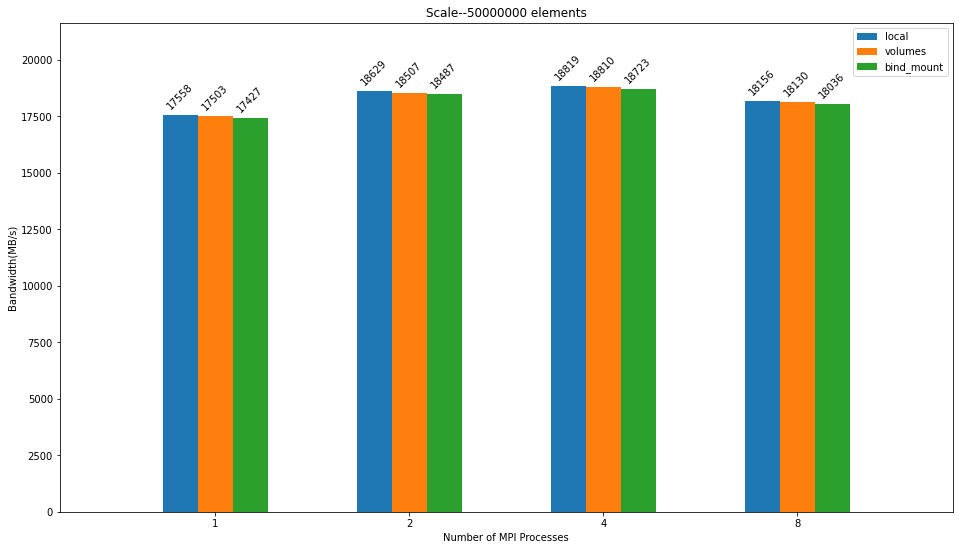

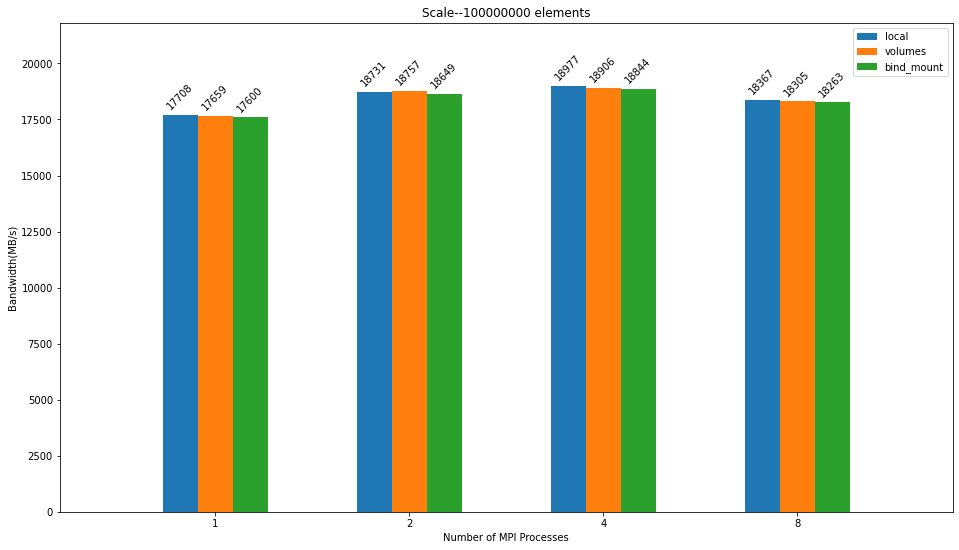

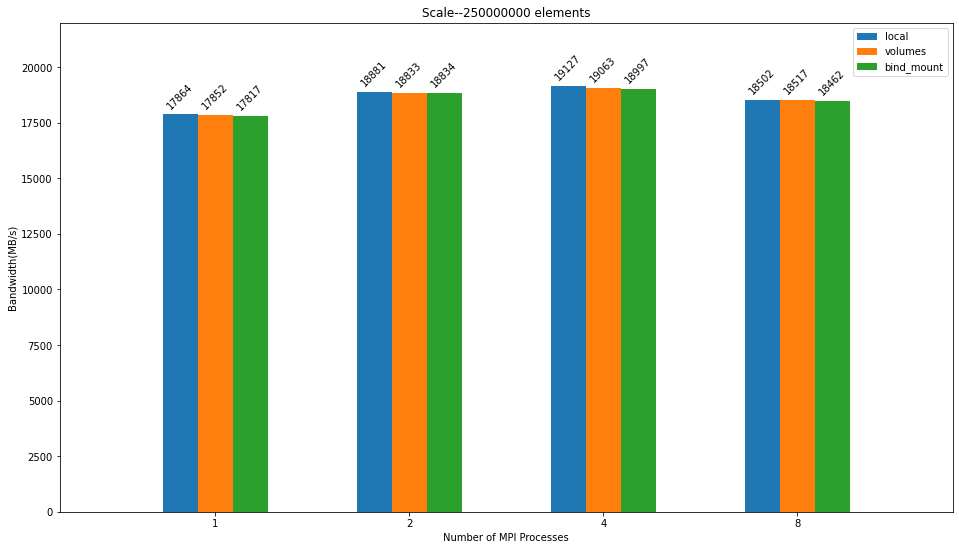

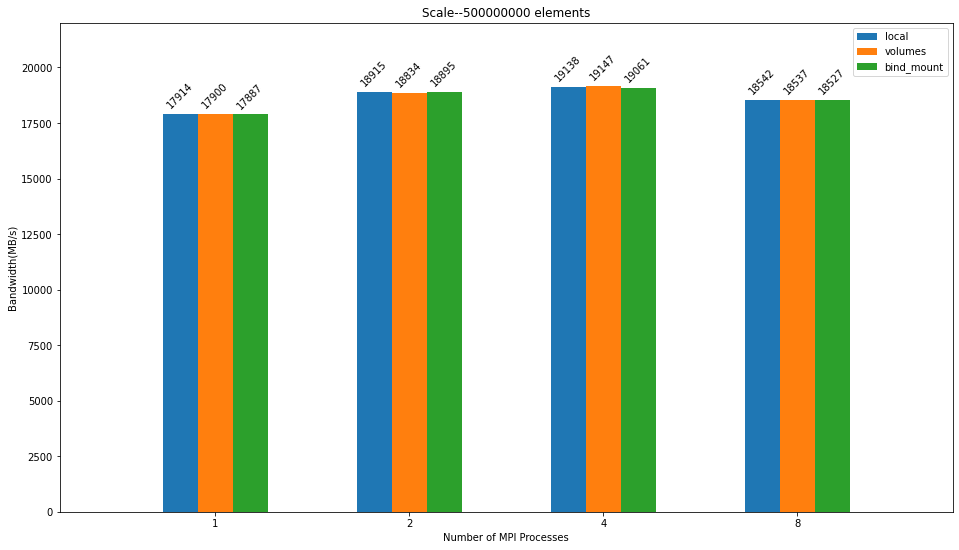

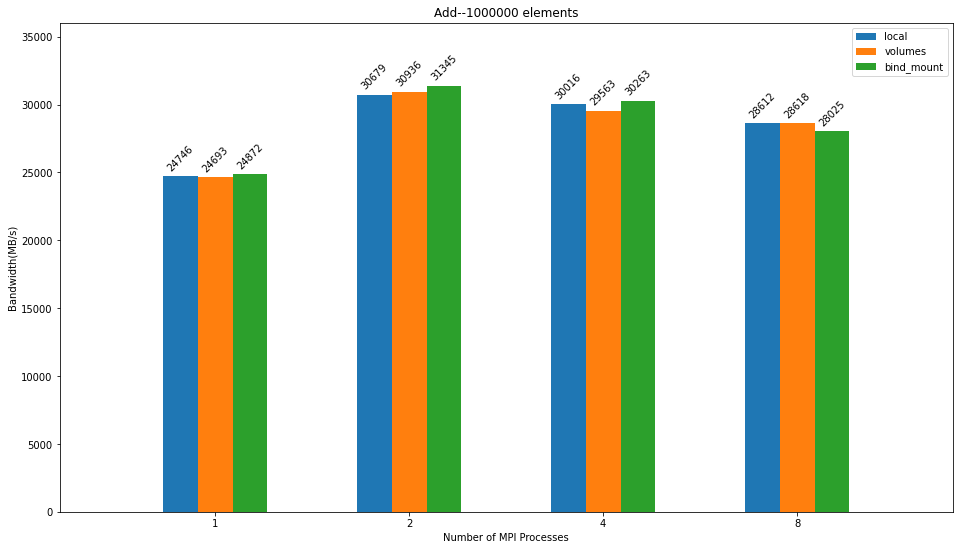

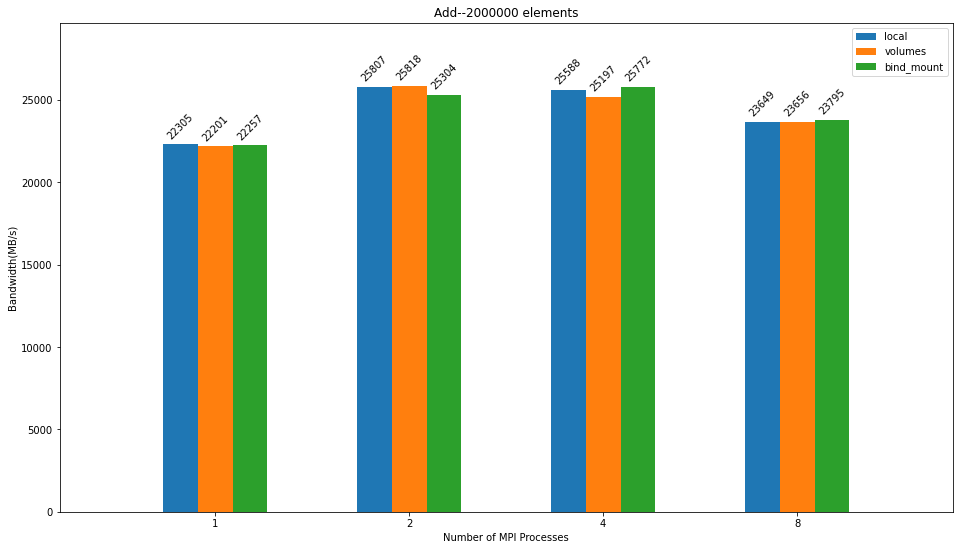

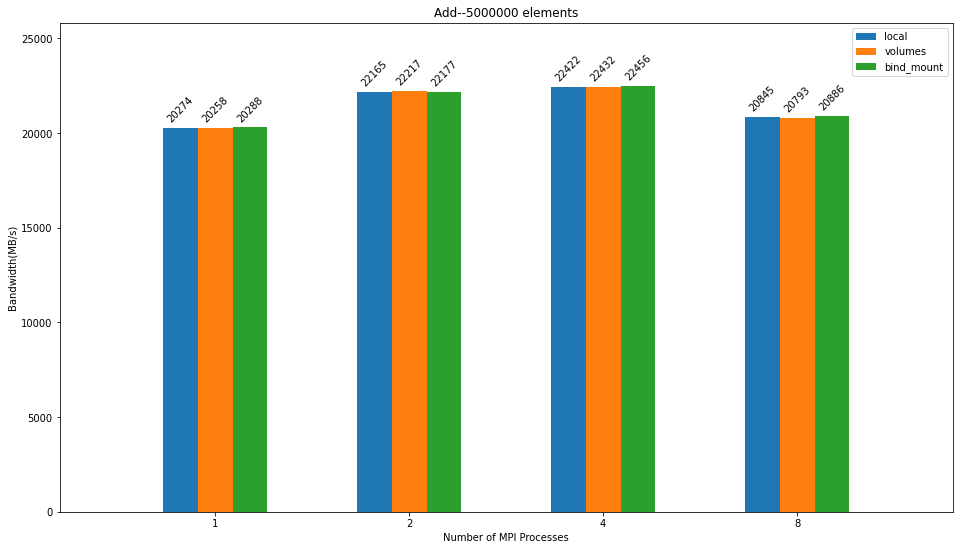

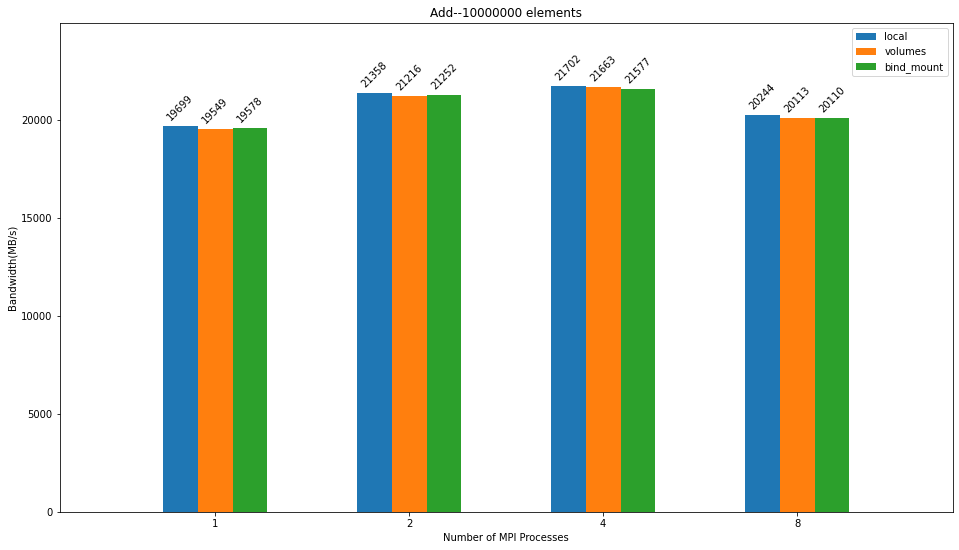

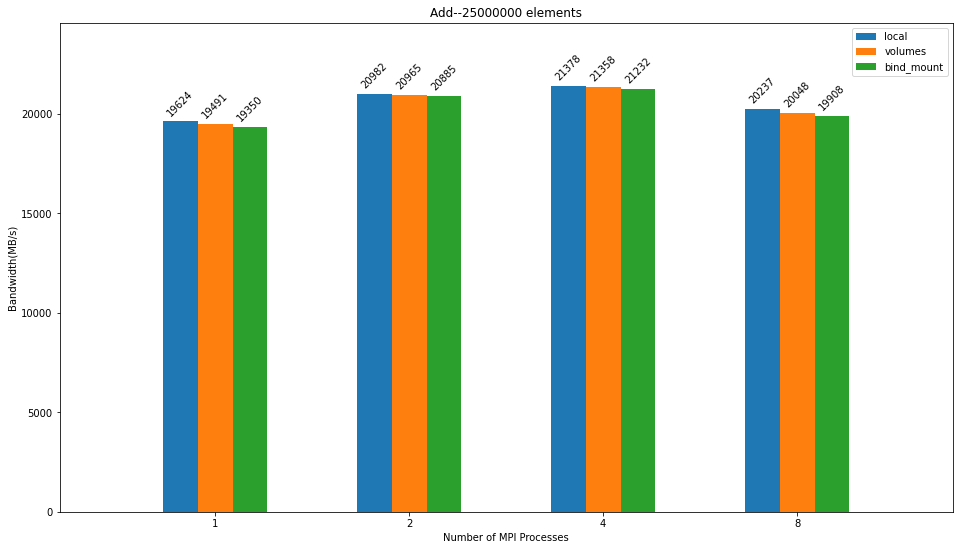

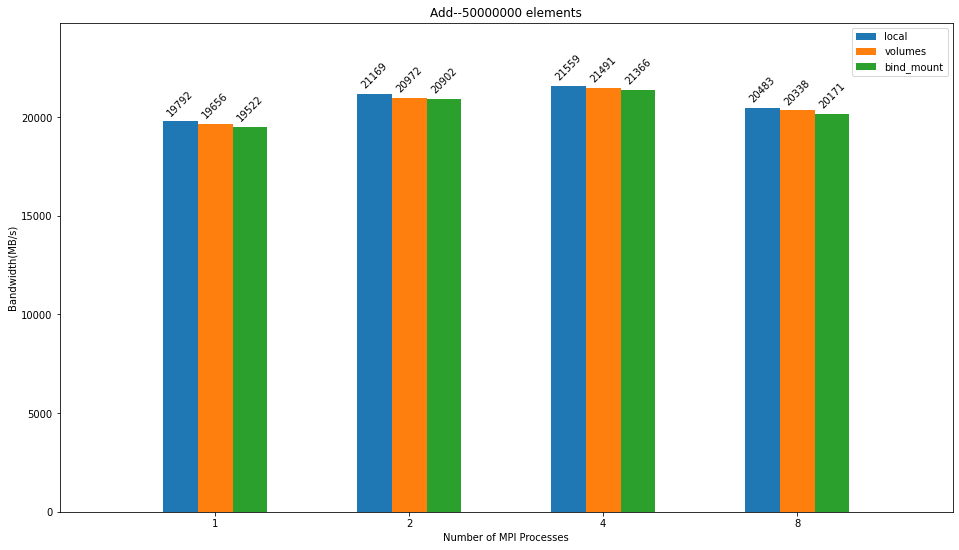

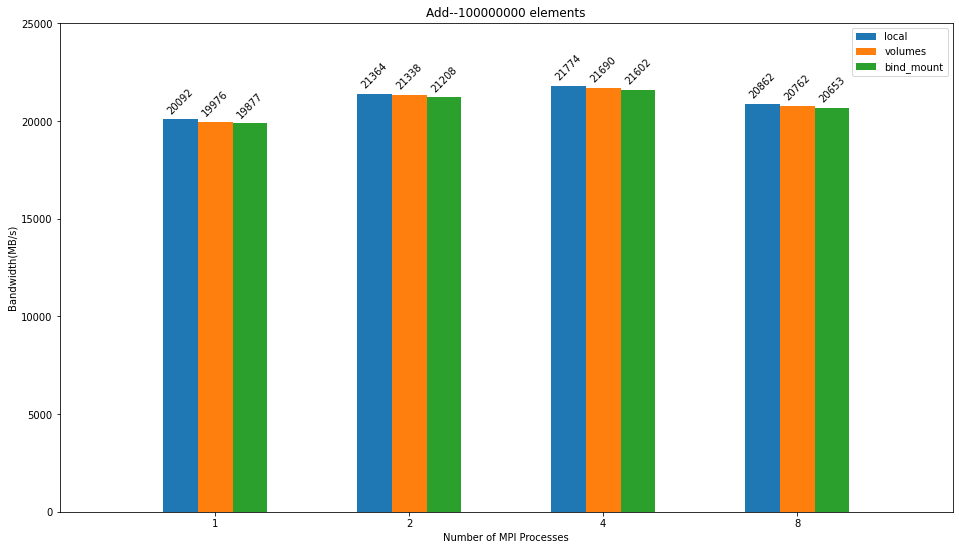

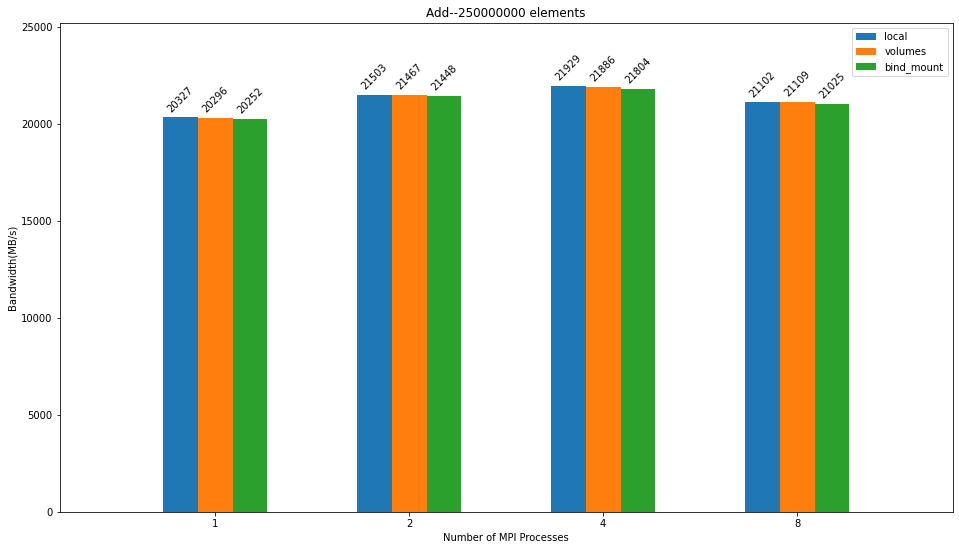

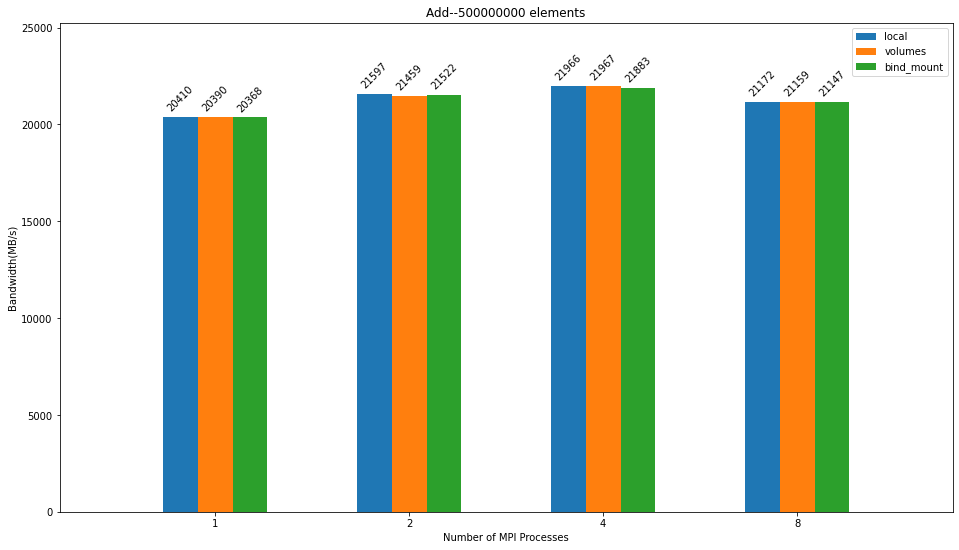

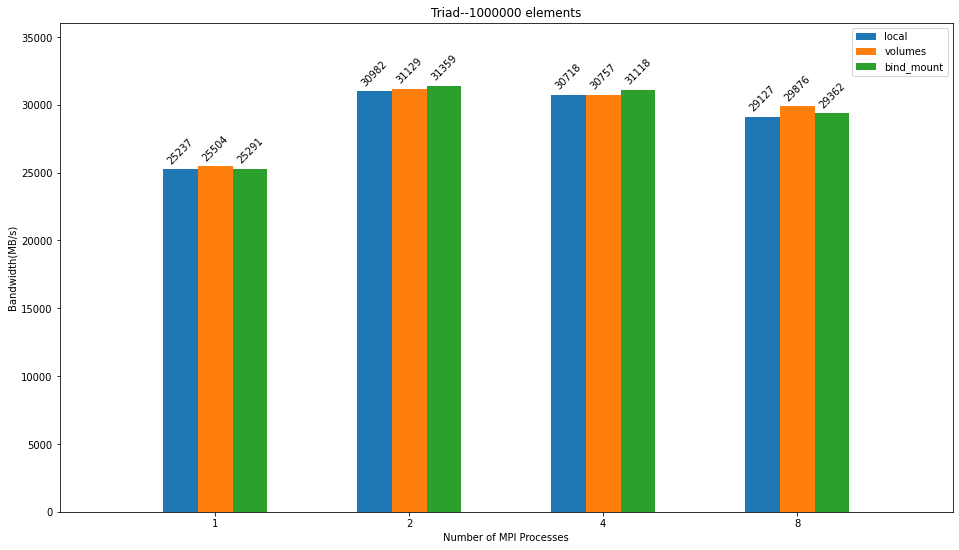

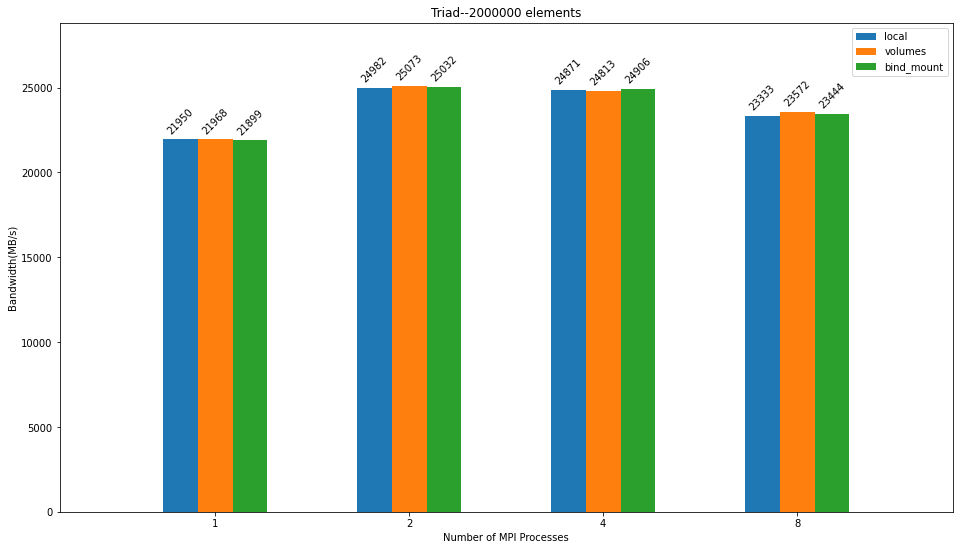

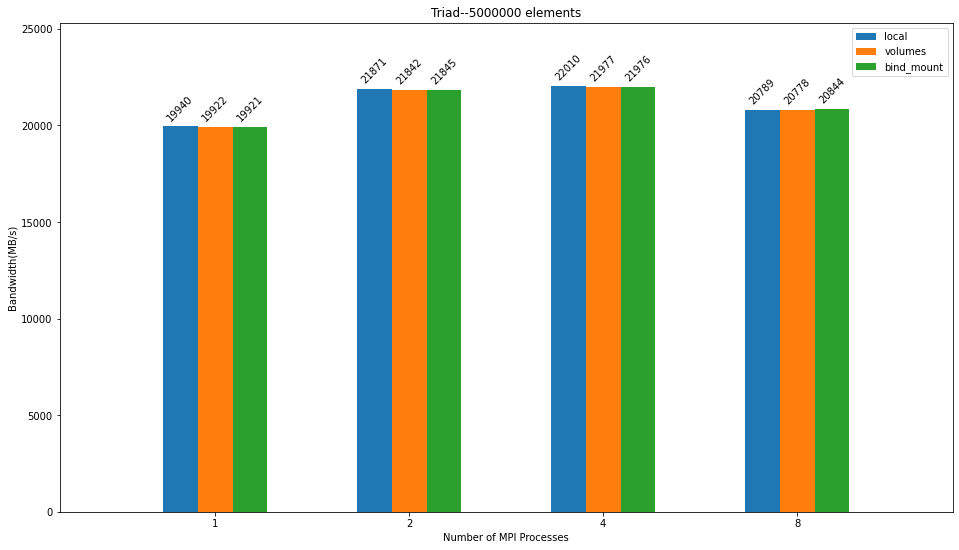

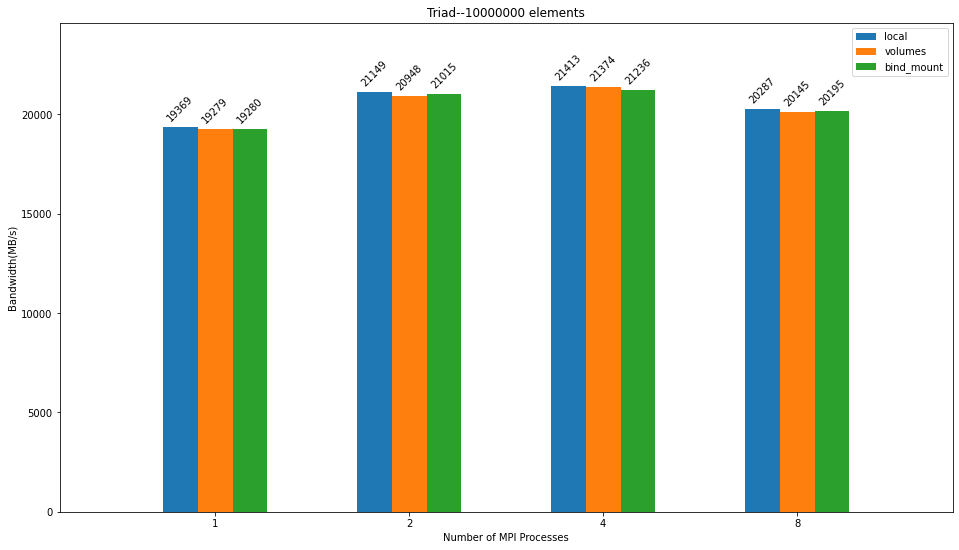

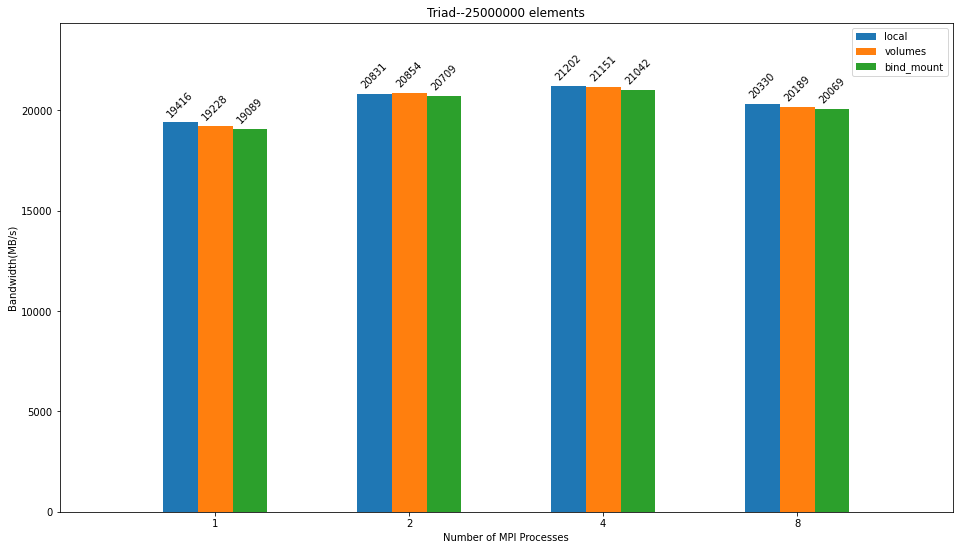

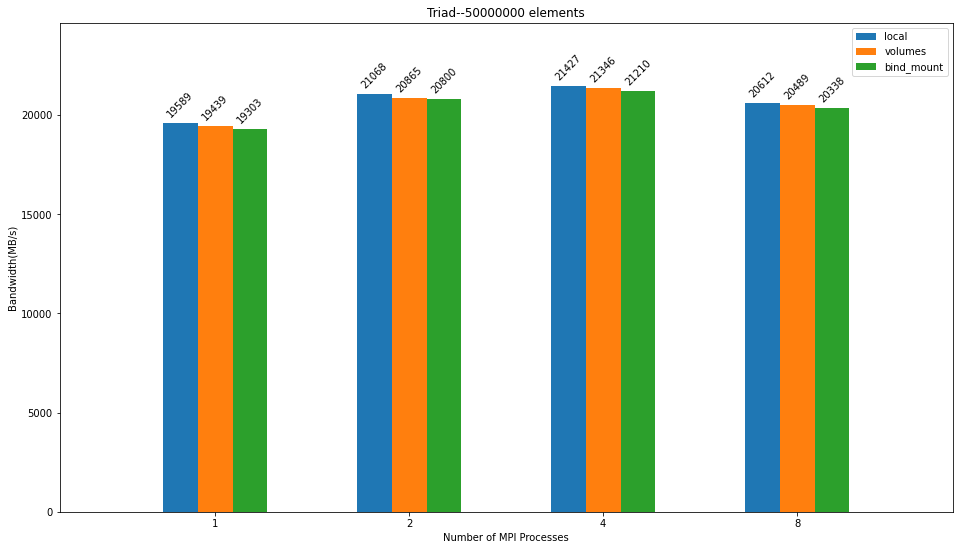

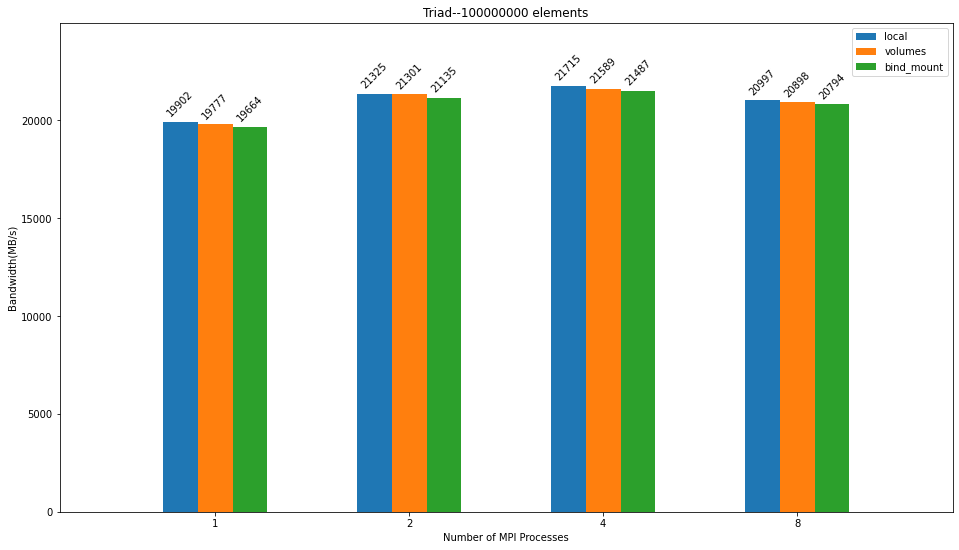

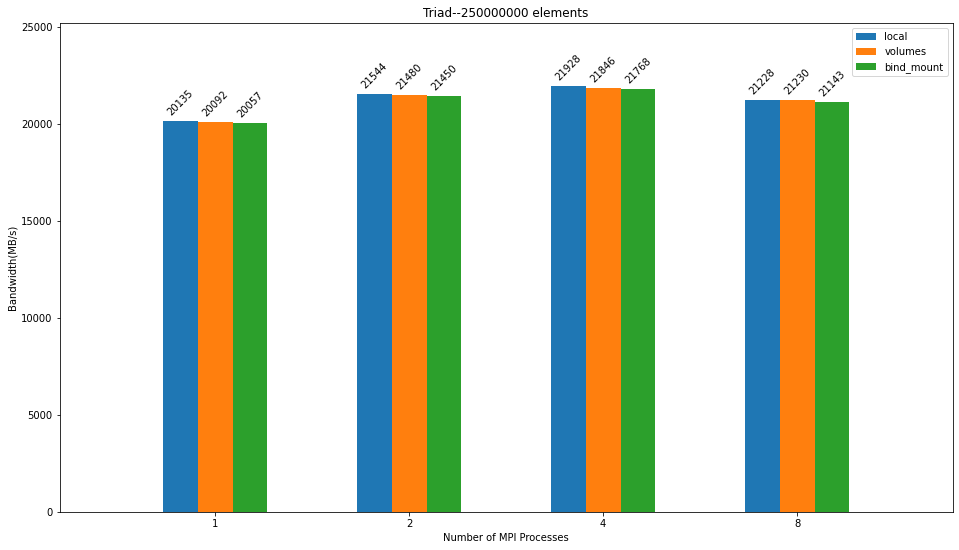

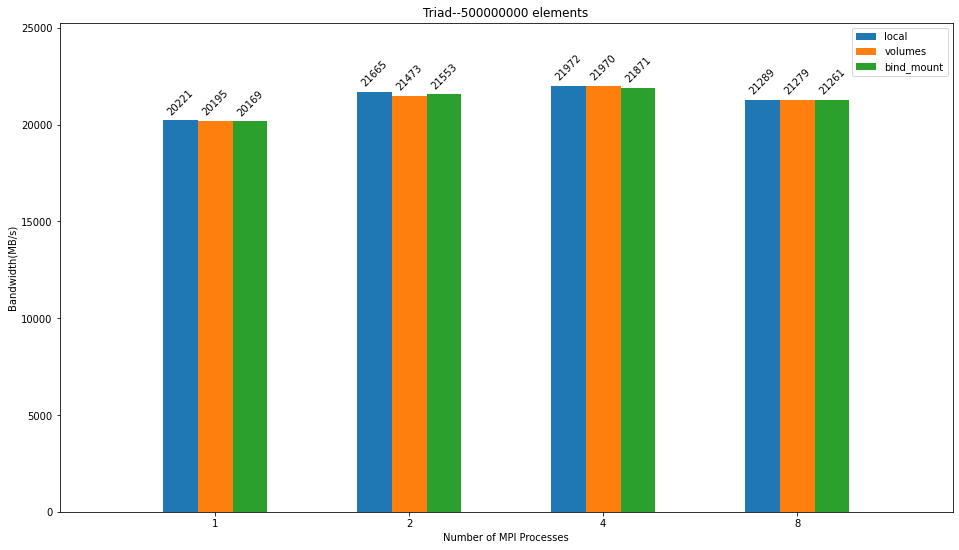

In [36]:
read_write = ["Copy", "Scale", "Add", "Triad"]
num_proc = [1,2,4,8]
num_part = [1000000,2000000,5000000,10000000,25000000,50000000,100000000,250000000,500000000]
width = 0.18
ind = np.arange(4)


for i in read_write:
    df1 = df_local[df_local["Type"]==i]
    df2 = df_volume[df_volume["Type"]==i]
    df3 = df_bind[df_bind["Type"]==i]
    
    for j in num_part:
        df11 = df1[df1["NumElements"]==j]
        df22 = df2[df2["NumElements"]==j]
        df33 = df3[df3["NumElements"]==j]

        fig = plt.figure(figsize=(16, 9))
        ax = fig.add_subplot(111)
        xvals = []
        yvals = []
        zvals = []
        for k in num_proc:
            xvals.append(int(df11[df11["Processes"]==k]["Bandwidth"]))
            yvals.append(int(df22[df22["Processes"]==k]["Bandwidth"]))
            zvals.append(int(df33[df33["Processes"]==k]["Bandwidth"]))
        
        rects1 = ax.bar(ind, xvals, width, color='tab:blue')
        rects2 = ax.bar([i+width for i in ind], yvals, width, color='tab:orange')
        rects3 = ax.bar([i+width*2 for i in ind], zvals, width, color='tab:green')
        ax.set_xlabel("Number of MPI Processes")
        ax.set_ylabel("Bandwidth(MB/s)")
        ax.set_xticks([i+width for i in ind])
        ax.set_xticklabels((1,2,4,8))
        ax.legend((rects1[0], rects2[0], rects3[0]), ("local", "volumes", "bind_mount"))
        plt.title(i + "--" + str(j) + " elements")
        autolabel(rects1)
        autolabel(rects2)
        autolabel(rects3)
        plt.margins(0.15)
        plt.show()